# Extrema Search Workflow PlayGround
This is the notebook for test and experiment functions behavior that belong the Extrema Search workflow

In [1]:
import numpy as np

## Representation of 2D Gird by 1D vector of vectors

## Representation of 2D Gird by Matrix of vectors

## Extrema Finding Function Validation

In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from active_flow.extrema_search.algorithm_tasks import _create_grid, _find_extrema
import active_flow.extrema_search.helpers.axis_formater as formatter

In [3]:
PROJECT_PATH = pathlib.Path().cwd().parents[0]

In [4]:
# Styling
from cycler import cycler

plt.style.use([
    PROJECT_PATH.joinpath('config/matplotlib/main.mplstyle'),
    PROJECT_PATH.joinpath('config/matplotlib/scatter.mplstyle'),
    {
        "figure.figsize": (8,8),
        "figure.dpi": 100
    }
])

plt.rc(
    'axes', 
    prop_cycle=(cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))
    )

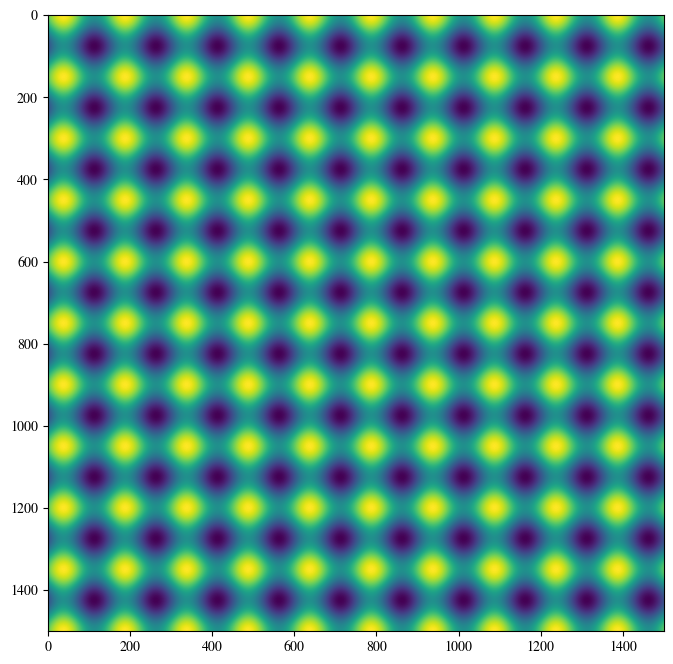

In [15]:
axis = np.linspace(0, 2*np.pi, 1500)
x, y = np.meshgrid(axis, axis)

z = np.sin(10*x) + np.cos(10*y)

fig, ax = plt.subplots()

ax.imshow(z)

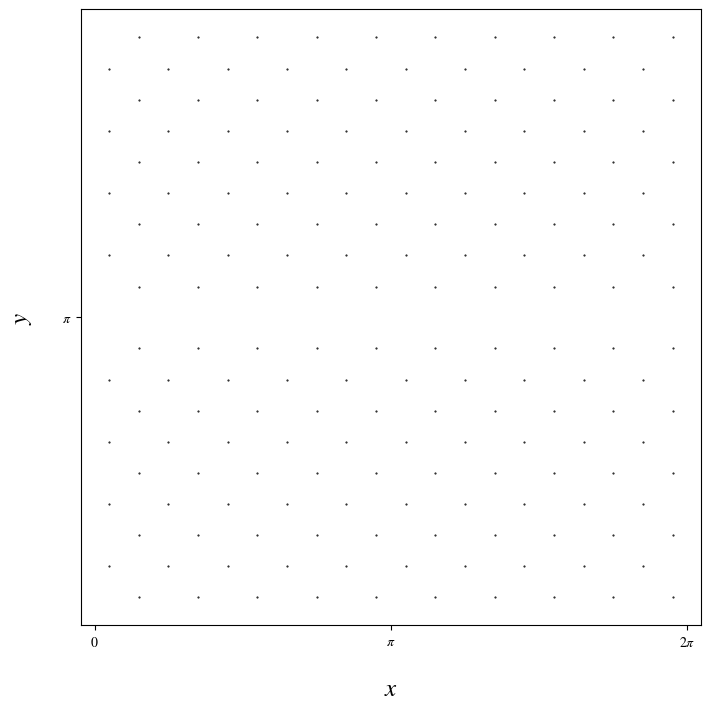

In [16]:
grid = _create_grid(x, y, z)
all_extrema, minima, maxima = _find_extrema(grid)

fig, ax = plt.subplots()
ax.scatter(all_extrema[:,0], all_extrema[:,1], s=1, marker = '.', color= "black")

ax.set(
    xlabel = r"$x$",
    ylabel= r"$y$"
    )
ax.xaxis.set_major_locator(plt.MultipleLocator(np.max(x[0,:])/2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(formatter.multiple_formatter()))
ax.yaxis.set_major_locator(plt.MultipleLocator(np.max(y[:,0])/2))
ax.yaxis.set_major_formatter(plt.FuncFormatter(formatter.multiple_formatter()))

In [21]:
np.savetxt(PROJECT_PATH.joinpath("data/reference data/hyperuniformity_analysis/crystal_point_ordering.txt"), all_extrema)